# The dataset contains articles that are classified into a number of different categories. Let's see how to design a neural network that can be trained on this dataset to accurately determine what words determine what category. We will create the vecs.tsv and meta.tsv files and load them into the embedding projector.

In [1]:
import os
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:

#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

print(len(stopwords))

153


In [3]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [4]:
sentences = []
labels = []

with open("C:/Users/TaniaChakraborty/Desktop/ML-Projects/Natural Language Processing/BBC-news-dataset/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # Ignoring headings
    #file = open(filename, encoding="utf8")
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
          #  sentence = sentence.replace("  ", " ")
        sentences.append(sentence)


print(len(sentences))
for i in range(0,len(labels)):
    print(labels[i])
    print(f"All the sentences related to '{labels[i]}':- ")
    print( sentences[i])
    

2225
tech
All the sentences related to 'tech':- 
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedule

moody joins england lewis moody flown dublin join england s camp ahead rbs six nations game ireland sunday.  despite joining squad  leicester flanker  slim  chance playing infection finger. decision will taken saturday whether 26-year-old will declared fit. fails recover time game  place back pack will taken andy hazell. chris jones will start game bench.  chances playing slim   said coach andy robinson.  infection deeper thought.   moody put drip attempt force antibiotics infected finger. suffered cut playing france twickenham became infected 10-minute outing replacement leicester newcastle last saturday.  mud got   robinson added.  big course antibiotics haven t done job hoped would.  robinson already forced make one change starting line-up bath prop matt stevens coming injured phil vickery.  22-year-old made 10 starts club made 49 appearances bench.  can frustrating ve lot game time season m ready   stevens said.  ve tour boys ve england set-up two years know calls way play.  steven

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Dividing dataset into training-set and validation-set

In [5]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
    
print(tokenizer)
print(tokenizer.word_counts) #Ordered-Dictionary of words and their counts
print()
print("###################################################")
print()

#print(word_index) # Dictionary containing word-index pair 
for key, value in word_index.items():
      print (key, ": ", value)

print()
print("###################################################")
print()

# Transforms each text in texts to a sequence of integers.
train_sequences = tokenizer.texts_to_sequences(train_sentences)

#pad_sequences is used to ensure that all sequences in a list have the same length. 
#By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the 
#longest sequence.
#To pad to the end of the sequences one can set padding='post'.
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen = max_length)

print(train_sequences)# List of lists containing indexed values of words in sentences
print(train_padded)# Numpy array with shape `(len(sequences), maxlen)`
print()
print(len(word_index))
print()
print("###################################################")
print()
print((train_sequences[0]))
print((train_padded[0]))
print()
print("###################################################")
print()
print((train_sequences[10]))
print((train_padded[10]))
print()
print("###################################################")
print()

OrderedDict([('tv', 414), ('future', 305), ('hands', 74), ('viewers', 76), ('home', 537), ('theatre', 85), ('systems', 105), ('plasma', 8), ('high', 416), ('definition', 66), ('tvs', 15), ('digital', 339), ('video', 289), ('recorders', 19), ('moving', 70), ('living', 71), ('room', 53), ('way', 591), ('people', 1617), ('watch', 93), ('will', 3643), ('radically', 9), ('different', 199), ('five', 425), ('years', 831), ('time', 1051), ('according', 338), ('expert', 22), ('panel', 70), ('gathered', 32), ('annual', 134), ('consumer', 164), ('electronics', 62), ('show', 500), ('las', 21), ('vegas', 20), ('discuss', 50), ('new', 1578), ('technologies', 90), ('impact', 108), ('one', 1499), ('favourite', 96), ('pastimes', 1), ('us', 1550), ('leading', 129), ('trend', 53), ('programmes', 76), ('content', 180), ('delivered', 42), ('via', 108), ('networks', 141), ('cable', 61), ('satellite', 40), ('telecoms', 51), ('companies', 331), ('broadband', 235), ('service', 369), ('providers', 33), ('front'

confident :  1031
question :  1032
gadgets :  1033
defeat :  1034
dropped :  1035
lower :  1036
27 :  1037
described :  1038
society :  1039
effort :  1040
successful :  1041
websites :  1042
significant :  1043
thousands :  1044
wide :  1045
written :  1046
deficit :  1047
social :  1048
athens :  1049
crime :  1050
peter :  1051
predicted :  1052
couple :  1053
recovery :  1054
wireless :  1055
pair :  1056
announcement :  1057
protection :  1058
peer :  1059
mobiles :  1060
suggested :  1061
leaders :  1062
asia :  1063
daily :  1064
planning :  1065
appear :  1066
actually :  1067
giving :  1068
disaster :  1069
talk :  1070
democrats :  1071
offering :  1072
operating :  1073
files :  1074
someone :  1075
expect :  1076
parents :  1077
bankruptcy :  1078
taylor :  1079
send :  1080
judge :  1081
nearly :  1082
ways :  1083
effect :  1084
penalty :  1085
conservatives :  1086
present :  1087
talking :  1088
terror :  1089
richard :  1090
5bn :  1091
controversial :  1092
takeover :

joint :  1751
tech :  1752
touch :  1753
soul :  1754
leaving :  1755
currency :  1756
deputy :  1757
lewis :  1758
yahoo :  1759
90 :  1760
recorded :  1761
assets :  1762
science :  1763
camp :  1764
proposal :  1765
developers :  1766
heard :  1767
handsets :  1768
lets :  1769
suspects :  1770
artist :  1771
jonathan :  1772
ds :  1773
vital :  1774
setting :  1775
swiss :  1776
iaaf :  1777
goods :  1778
jack :  1779
opinion :  1780
italian :  1781
speeds :  1782
gain :  1783
blogs :  1784
indonesia :  1785
link :  1786
highly :  1787
female :  1788
reasons :  1789
seats :  1790
novel :  1791
imf :  1792
hd :  1793
lawyers :  1794
clubs :  1795
tom :  1796
directed :  1797
cast :  1798
basic :  1799
sydney :  1800
slightly :  1801
fresh :  1802
trillion :  1803
specific :  1804
achieved :  1805
word :  1806
closer :  1807
driving :  1808
explained :  1809
greatest :  1810
dead :  1811
cap :  1812
roger :  1813
turning :  1814
medal :  1815
glasgow :  1816
wouldn :  1817
commission

detained :  2638
leads :  2639
pushing :  2640
recording :  2641
gates :  2642
8m :  2643
criminals :  2644
pull :  2645
returns :  2646
racist :  2647
stepped :  2648
falls :  2649
entire :  2650
helps :  2651
disease :  2652
practice :  2653
potter :  2654
fired :  2655
mouse :  2656
understood :  2657
efficient :  2658
150 :  2659
emergency :  2660
hughes :  2661
abuse :  2662
proving :  2663
dedicated :  2664
electoral :  2665
officers :  2666
suddenly :  2667
federation :  2668
arts :  2669
funded :  2670
investments :  2671
mcconnell :  2672
matthew :  2673
eyes :  2674
contrast :  2675
purchase :  2676
ukraine :  2677
kicked :  2678
moments :  2679
auto :  2680
ultimate :  2681
operate :  2682
discussions :  2683
â£3 :  2684
remote :  2685
argentine :  2686
bay :  2687
42 :  2688
keys :  2689
mainstream :  2690
thank :  2691
desperate :  2692
lisbon :  2693
promises :  2694
earn :  2695
wanting :  2696
impossible :  2697
latin :  2698
universal :  2699
silver :  2700
trusted :  

mirza :  3389
mcletchie :  3390
rebate :  3391
skype :  3392
las :  3393
replay :  3394
reflect :  3395
client :  3396
knocked :  3397
joins :  3398
2m :  3399
stance :  3400
discipline :  3401
decent :  3402
teenage :  3403
dubai :  3404
nicolas :  3405
upper :  3406
pact :  3407
41 :  3408
carlos :  3409
kim :  3410
multiple :  3411
horse :  3412
accident :  3413
ends :  3414
heading :  3415
delays :  3416
partners :  3417
contains :  3418
click :  3419
analysis :  3420
fitness :  3421
3d :  3422
otherwise :  3423
swap :  3424
mainly :  3425
proof :  3426
adaptation :  3427
married :  3428
explorer :  3429
ie :  3430
pages :  3431
osbourne :  3432
itv1 :  3433
grounds :  3434
al :  3435
informed :  3436
pupils :  3437
regarding :  3438
hurdles :  3439
enable :  3440
discussion :  3441
mikhail :  3442
discovered :  3443
fundamental :  3444
grant :  3445
convinced :  3446
tackling :  3447
representatives :  3448
intention :  3449
check :  3450
anger :  3451
servants :  3452
deserve :  

updated :  4211
influential :  4212
reporting :  4213
noted :  4214
necessarily :  4215
judged :  4216
minorities :  4217
enterprise :  4218
nigel :  4219
tate :  4220
teacher :  4221
typically :  4222
launches :  4223
involve :  4224
safer :  4225
protecting :  4226
depp :  4227
9bn :  4228
jerry :  4229
approached :  4230
threw :  4231
odd :  4232
server :  4233
greene :  4234
voip :  4235
tags :  4236
liberties :  4237
extraordinary :  4238
afraid :  4239
headline :  4240
interviewed :  4241
deliberately :  4242
fuelled :  4243
complained :  4244
dropping :  4245
fictional :  4246
amongst :  4247
politician :  4248
context :  4249
georgia :  4250
volume :  4251
adams :  4252
fantasy :  4253
abandoned :  4254
sooner :  4255
afghanistan :  4256
detail :  4257
aragones :  4258
eric :  4259
rare :  4260
leap :  4261
predicting :  4262
thriller :  4263
dragons :  4264
yachvili :  4265
michalak :  4266
imagine :  4267
airports :  4268
active :  4269
switched :  4270
hdtv :  4271
dealing :

batteries :  5086
maggs :  5087
announcements :  5088
rail :  5089
bombay :  5090
belgian :  5091
â£1bn :  5092
jointly :  5093
factories :  5094
kasabian :  5095
scare :  5096
reception :  5097
cook :  5098
influenced :  5099
irb :  5100
amnesty :  5101
outrage :  5102
failures :  5103
processes :  5104
relevant :  5105
belgium :  5106
arabia :  5107
ronan :  5108
solo :  5109
housewives :  5110
mauresmo :  5111
ninth :  5112
inclusion :  5113
edition :  5114
consulting :  5115
rent :  5116
skin :  5117
racial :  5118
territory :  5119
hottest :  5120
latinohiphopradio :  5121
djs :  5122
boyd :  5123
reflecting :  5124
pierre :  5125
rick :  5126
enemy :  5127
tired :  5128
keanu :  5129
beach :  5130
1969 :  5131
distributor :  5132
maternity :  5133
quiet :  5134
kezman :  5135
fowler :  5136
slip :  5137
yorkshire :  5138
frozen :  5139
fifa :  5140
michelle :  5141
broadway :  5142
portal :  5143
doug :  5144
powered :  5145
specifications :  5146
port :  5147
highlights :  5148


elgindy :  6086
sinclair :  6087
scarlets :  6088
alerts :  6089
cabir :  6090
skulls :  6091
mcallister :  6092
genocide :  6093
milk :  6094
patterns :  6095
assist :  6096
reggae :  6097
muse :  6098
phytopharm :  6099
lanzone :  6100
walter :  6101
mccall :  6102
spector :  6103
fosters :  6104
inter :  6105
vogts :  6106
oracle :  6107
sigarchi :  6108
exeem :  6109
tevez :  6110
aguas :  6111
radically :  6112
essentially :  6113
generations :  6114
enhancing :  6115
bernie :  6116
overseeing :  6117
myers :  6118
transformed :  6119
mounted :  6120
wary :  6121
brentford :  6122
allen :  6123
brom :  6124
preston :  6125
county :  6126
predecessor :  6127
pig :  6128
ordinator :  6129
favoured :  6130
shoulder :  6131
1977 :  6132
sophie :  6133
hitler :  6134
somehow :  6135
qantas :  6136
temperatures :  6137
excessive :  6138
branch :  6139
valencia :  6140
youngest :  6141
framework :  6142
confusing :  6143
anne :  6144
respects :  6145
sumitomo :  6146
latter :  6147
daiwa

steering :  6701
wheel :  6702
formula :  6703
carries :  6704
mentally :  6705
corrigan :  6706
wrongdoing :  6707
santander :  6708
disputed :  6709
pakistani :  6710
rupert :  6711
contentious :  6712
binding :  6713
â£12 :  6714
reaches :  6715
pub :  6716
peaked :  6717
molik :  6718
willingness :  6719
scepticism :  6720
qaeda :  6721
corporations :  6722
queries :  6723
bow :  6724
weakening :  6725
painting :  6726
samples :  6727
guns :  6728
jewellery :  6729
shortlisted :  6730
amelie :  6731
svetlana :  6732
mad :  6733
thus :  6734
presenting :  6735
â£30 :  6736
pitches :  6737
exists :  6738
judging :  6739
2011 :  6740
presentation :  6741
chilean :  6742
def :  6743
prodigy :  6744
bernabeu :  6745
melcher :  6746
1988 :  6747
venice :  6748
â£3bn :  6749
unemployed :  6750
renew :  6751
bosvelt :  6752
arjen :  6753
crossed :  6754
ferreira :  6755
romanian :  6756
sexual :  6757
glass :  6758
requiring :  6759
40m :  6760
programmers :  6761
inaccurate :  6762
penny 

unwanted :  7478
deer :  7479
bradshaw :  7480
negotiated :  7481
checked :  7482
norfolk :  7483
selecting :  7484
mould :  7485
employing :  7486
thrilling :  7487
barbarians :  7488
misery :  7489
telcos :  7490
sits :  7491
compression :  7492
telco :  7493
offerings :  7494
exploiting :  7495
bold :  7496
aurelien :  7497
marconnet :  7498
bruno :  7499
mas :  7500
stimulate :  7501
dow :  7502
ancient :  7503
destined :  7504
unavailable :  7505
newer :  7506
accounted :  7507
01 :  7508
smashed :  7509
fraser :  7510
vault :  7511
kemp :  7512
holcim :  7513
locks :  7514
resource :  7515
lighter :  7516
masters :  7517
roland :  7518
wrist :  7519
criticise :  7520
disadvantaged :  7521
tactical :  7522
sandy :  7523
massively :  7524
luciano :  7525
angled :  7526
downloadable :  7527
bridges :  7528
advertise :  7529
floated :  7530
â£13 :  7531
forty :  7532
manic :  7533
holy :  7534
ringtones :  7535
transparency :  7536
inadvertently :  7537
insulting :  7538
spectators :

provinces :  8333
headset :  8334
zen :  8335
andersen :  8336
darker :  8337
ugly :  8338
sap :  8339
magazines :  8340
warming :  8341
ivory :  8342
outsourcing :  8343
spy :  8344
makarov :  8345
diplomatic :  8346
milanesi :  8347
distinctive :  8348
alter :  8349
pleasure :  8350
organising :  8351
transferred :  8352
removing :  8353
palestinians :  8354
restate :  8355
jelena :  8356
sarbanes :  8357
oxley :  8358
entourage :  8359
â£53 :  8360
environments :  8361
creatures :  8362
ships :  8363
physics :  8364
blend :  8365
gdc :  8366
phantom :  8367
dynamic :  8368
constituents :  8369
fleet :  8370
cancellations :  8371
tariff :  8372
expire :  8373
inkjet :  8374
dependent :  8375
picks :  8376
toronto :  8377
completion :  8378
monumental :  8379
naturally :  8380
depends :  8381
irons :  8382
wondered :  8383
dominates :  8384
jain :  8385
spots :  8386
ampas :  8387
presenters :  8388
scripts :  8389
cas :  8390
diagnosed :  8391
forming :  8392
footed :  8393
touching 

coped :  9376
wore :  9377
whim :  9378
behave :  9379
detective :  9380
overly :  9381
centuries :  9382
bases :  9383
alerting :  9384
killings :  9385
miscarriages :  9386
blitz :  9387
tagged :  9388
differently :  9389
laughable :  9390
freedoms :  9391
grieve :  9392
abuses :  9393
regards :  9394
bombings :  9395
550 :  9396
exchequer :  9397
hussein :  9398
arrange :  9399
benn :  9400
hostile :  9401
unprotected :  9402
sania :  9403
eventual :  9404
nighty :  9405
mandaric :  9406
rfu :  9407
livid :  9408
dour :  9409
agroflora :  9410
unfavourable :  9411
dire :  9412
marlu :  9413
bland :  9414
transportation :  9415
workings :  9416
exemptions :  9417
seeds :  9418
â£150 :  9419
equalised :  9420
suv :  9421
netratings :  9422
struggles :  9423
potent :  9424
diving :  9425
viability :  9426
eighteen :  9427
pirate :  9428
vcr :  9429
advertisements :  9430
bored :  9431
shine :  9432
ipcl :  9433
mailed :  9434
irritating :  9435
texts :  9436
both :  9437
surrey :  9438

ewan :  10243
enqvist :  10244
weddings :  10245
iceland :  10246
proportionate :  10247
registrars :  10248
rimmer :  10249
allocated :  10250
austin :  10251
wasting :  10252
tracey :  10253
chin :  10254
bests :  10255
joice :  10256
allahgreen :  10257
91m :  10258
yusuf :  10259
flushing :  10260
hobday :  10261
preferable :  10262
deliveries :  10263
daddy :  10264
berman :  10265
caf :  10266
restored :  10267
readily :  10268
listened :  10269
climbing :  10270
kiwis :  10271
sparking :  10272
smiles :  10273
willie :  10274
geoffrey :  10275
1972 :  10276
stradey :  10277
haden :  10278
fooled :  10279
bruising :  10280
graczyk :  10281
ecosystem :  10282
interactivity :  10283
receiver :  10284
rounds :  10285
thrashed :  10286
sowden :  10287
succeeding :  10288
displaced :  10289
marques :  10290
accompanying :  10291
emilio :  10292
â£17m :  10293
claire :  10294
thwart :  10295
aac :  10296
stylus :  10297
installing :  10298
antenna :  10299
develops :  10300
manufacture

larne :  10897
chased :  10898
arkansas :  10899
richter :  10900
carlisle :  10901
herron :  10902
permit :  10903
inexperienced :  10904
woodford :  10905
kudrow :  10906
â£39 :  10907
dented :  10908
chocolate :  10909
broadly :  10910
gunning :  10911
underline :  10912
bsa :  10913
packaging :  10914
detection :  10915
hired :  10916
600m :  10917
royer :  10918
buyout :  10919
hellenic :  10920
slurry :  10921
freddy :  10922
christina :  10923
mmc :  10924
teens :  10925
festivals :  10926
outings :  10927
overcrowding :  10928
walkouts :  10929
balloted :  10930
walkout :  10931
gisbergen :  10932
mapletoft :  10933
greening :  10934
partridge :  10935
devaluation :  10936
100bn :  10937
hartz :  10938
zafi :  10939
niggling :  10940
disorder :  10941
thrust :  10942
tore :  10943
dani :  10944
pave :  10945
hefty :  10946
radius :  10947
galaxy :  10948
discovering :  10949
pianist :  10950
sabotage :  10951
invasive :  10952
bridgehead :  10953
fingerprinting :  10954
sampras

icrc :  11863
dotted :  11864
tracing :  11865
relocate :  11866
persistently :  11867
herself :  11868
flattering :  11869
respectful :  11870
brass :  11871
barley :  11872
stereotypical :  11873
sketch :  11874
ernest :  11875
npd :  11876
versa :  11877
pencilled :  11878
thayer :  11879
empt :  11880
exercises :  11881
digitised :  11882
pros :  11883
teething :  11884
textual :  11885
scroll :  11886
125m :  11887
vijay :  11888
a320 :  11889
overplayed :  11890
stripes :  11891
spitting :  11892
flock :  11893
spencer :  11894
jade :  11895
pentathlon :  11896
condon :  11897
clitheroe :  11898
thie :  11899
77m :  11900
16m :  11901
tempered :  11902
wounded :  11903
staring :  11904
educate :  11905
derail :  11906
157 :  11907
moran :  11908
revisions :  11909
connecting :  11910
underpin :  11911
mom :  11912
bricks :  11913
keaton :  11914
supernatural :  11915
constantine :  11916
edelman :  11917
fabulous :  11918
tomas :  11919
russians :  11920
miserable :  11921
cores 

compatibility :  12688
removable :  12689
communiqu :  12690
megastores :  12691
genie :  12692
pointedly :  12693
corrosive :  12694
petty :  12695
scheduling :  12696
battered :  12697
ahmed :  12698
vociferously :  12699
overruling :  12700
supplements :  12701
rigorous :  12702
cisco :  12703
capella :  12704
engineers :  12705
floyd :  12706
hasselbaink :  12707
grim :  12708
dispel :  12709
amiga :  12710
puzzles :  12711
70m :  12712
gigabit :  12713
ev :  12714
lucent :  12715
flows :  12716
livermore :  12717
linpack :  12718
powering :  12719
modelling :  12720
computational :  12721
albanian :  12722
trafficking :  12723
abide :  12724
degrading :  12725
rehearsal :  12726
marcel :  12727
vibe :  12728
dislike :  12729
searched :  12730
demonising :  12731
theatres :  12732
tolkien :  12733
zealander :  12734
accountancy :  12735
relying :  12736
outweigh :  12737
ana :  12738
costin :  12739
plagued :  12740
stalwarts :  12741
annadale :  12742
hailstorm :  12743
differ :  

towers :  13575
abdication :  13576
engagements :  13577
clarence :  13578
pains :  13579
firebird :  13580
converts :  13581
tabs :  13582
creators :  13583
2500 :  13584
scarlett :  13585
skater :  13586
daly :  13587
rink :  13588
mentor :  13589
85m :  13590
â£46m :  13591
â£27 :  13592
accessories :  13593
rocketed :  13594
stemming :  13595
aig :  13596
pleas :  13597
pleading :  13598
bewlay :  13599
felony :  13600
deselect :  13601
unjust :  13602
batch :  13603
jimi :  13604
rae :  13605
guitarists :  13606
overdose :  13607
â£68m :  13608
capping :  13609
â£56m :  13610
mailshot :  13611
â£15m :  13612
resourced :  13613
shrank :  13614
upsetting :  13615
standstill :  13616
reliant :  13617
trimming :  13618
woolwich :  13619
felipe :  13620
vivancos :  13621
kronberg :  13622
dudley :  13623
dorival :  13624
04secs :  13625
63secs :  13626
southwest :  13627
conducts :  13628
globio :  13629
oregon :  13630
nirvana :  13631
riddled :  13632
rediscover :  13633
hawking :  1

hq :  14314
prank :  14315
surfaced :  14316
satire :  14317
slattery :  14318
prevents :  14319
gellhorn :  14320
leveraged :  14321
wma :  14322
mbita :  14323
cons :  14324
digitise :  14325
solar :  14326
maciej :  14327
sundra :  14328
brewers :  14329
fizz :  14330
stout :  14331
breweries :  14332
kroner :  14333
pubs :  14334
extends :  14335
alcobev :  14336
consumes :  14337
47bn :  14338
brainchild :  14339
susceptible :  14340
hirsch :  14341
versatile :  14342
imperial :  14343
knit :  14344
edges :  14345
disqualified :  14346
greaves :  14347
throws :  14348
powerhouse :  14349
011 :  14350
fracture :  14351
ambuja :  14352
aggregate :  14353
164 :  14354
kk :  14355
annoys :  14356
cringe :  14357
meteoric :  14358
breakers :  14359
bmr :  14360
silvas :  14361
creatives :  14362
cyclical :  14363
airplanes :  14364
winds :  14365
eva :  14366
717 :  14367
tanker :  14368
13bn :  14369
pavement :  14370
gotta :  14371
mats :  14372
wilander :  14373
adversity :  14374
c

distressed :  15251
bags :  15252
steamy :  15253
sideline :  15254
sheppey :  15255
adjudged :  15256
â£5bn :  15257
calyon :  15258
males :  15259
joynt :  15260
secular :  15261
ferrari :  15262
bandwagon :  15263
buses :  15264
hanau :  15265
ticketless :  15266
romen :  15267
ticketing :  15268
vindicated :  15269
mirrors :  15270
jvc :  15271
ailing :  15272
omar :  15273
blips :  15274
ruler :  15275
concealing :  15276
guinea :  15277
dylan :  15278
celestine :  15279
doorstep :  15280
spence :  15281
clapping :  15282
brownite :  15283
roasting :  15284
shipley :  15285
swan :  15286
showpiece :  15287
telford :  15288
slammed :  15289
tru :  15290
rakosky :  15291
deepened :  15292
sol :  15293
upson :  15294
upton :  15295
mbes :  15296
lamentable :  15297
levied :  15298
lingering :  15299
licensees :  15300
tailor :  15301
79p :  15302
defaced :  15303
mydoom :  15304
innuendoes :  15305
greet :  15306
leavers :  15307
gcse :  15308
juggle :  15309
abrupt :  15310
unrevise

boil :  15910
barings :  15911
chagrin :  15912
modernisation :  15913
shortcomings :  15914
foodservice :  15915
fraudulently :  15916
seafood :  15917
cooking :  15918
issuers :  15919
initiating :  15920
uniforms :  15921
initiate :  15922
135m :  15923
mauskopf :  15924
obstruction :  15925
tampering :  15926
defense :  15927
kickers :  15928
brutally :  15929
interrogated :  15930
zambian :  15931
naked :  15932
shorts :  15933
theede :  15934
debtor :  15935
940 :  15936
conferencing :  15937
connectotel :  15938
travelodge :  15939
magnus :  15940
mcewen :  15941
rejecting :  15942
papadoyiannakis :  15943
refute :  15944
illogical :  15945
procedural :  15946
persecuted :  15947
550m :  15948
bucket :  15949
protester :  15950
arabs :  15951
370m :  15952
â£196m :  15953
shied :  15954
portions :  15955
meals :  15956
unprofessional :  15957
73m :  15958
previews :  15959
shirley :  15960
entrepreneurial :  15961
1030 :  15962
practises :  15963
dilemma :  15964
martyrs :  1596

bankash :  16828
keystrokes :  16829
backlogs :  16830
appliance :  16831
mcfeeley :  16832
campus :  16833
holistic :  16834
headbutted :  16835
sans :  16836
nomura :  16837
mbe :  16838
underlines :  16839
cue :  16840
pretenders :  16841
sledge :  16842
jays :  16843
hynde :  16844
stool :  16845
glickman :  16846
disgusted :  16847
veils :  16848
pakistanis :  16849
willowfield :  16850
firepower :  16851
otoku :  16852
intents :  16853
smelling :  16854
masterpiece :  16855
salaam :  16856
perez :  16857
minx :  16858
captained :  16859
jeopardise :  16860
briefing :  16861
enquiries :  16862
strangest :  16863
lockyer :  16864
stowell :  16865
monaco :  16866
eras :  16867
diverts :  16868
barring :  16869
coat :  16870
â£139 :  16871
loophole :  16872
guernsey :  16873
amusing :  16874
adored :  16875
1937 :  16876
pantomime :  16877
pointon :  16878
steadfastly :  16879
contradictory :  16880
zinc :  16881
fiddled :  16882
fallon :  16883
pfeifer :  16884
breadth :  16885
ers 

gould :  17552
fellman :  17553
complimentary :  17554
dispiriting :  17555
unabashedly :  17556
trivial :  17557
cling :  17558
chord :  17559
correctness :  17560
recess :  17561
whips :  17562
bicep :  17563
haematoma :  17564
darkest :  17565
13s :  17566
12a :  17567
clones :  17568
anakin :  17569
erupting :  17570
volcanoes :  17571
molten :  17572
lava :  17573
beheaded :  17574
condemning :  17575
scholls :  17576
transcripts :  17577
gestapo :  17578
interrogations :  17579
township :  17580
godfrey :  17581
fend :  17582
snowfall :  17583
furness :  17584
averted :  17585
960m :  17586
â£499m :  17587
480m :  17588
redemptions :  17589
laah :  17590
chong :  17591
gyu :  17592
sejong :  17593
embryonic :  17594
mustn :  17595
nostalgic :  17596
harnessed :  17597
unearth :  17598
crowther :  17599
keothavong :  17600
workouts :  17601
instilling :  17602
29bn :  17603
persisting :  17604
deepening :  17605
alliances :  17606
268 :  17607
edgware :  17608
morpheme :  17609
ke

hasty :  18403
dementia :  18404
mencap :  18405
autistic :  18406
misunderstandings :  18407
legalising :  18408
xuren :  18409
311bn :  18410
â£165bn :  18411
593 :  18412
rebates :  18413
420bn :  18414
124bn :  18415
150bn :  18416
regulars :  18417
sid :  18418
carved :  18419
bless :  18420
hove :  18421
1934 :  18422
guildhall :  18423
cazalets :  18424
beresford :  18425
12km :  18426
wollaton :  18427
900m :  18428
shearman :  18429
accrued :  18430
soccerex :  18431
ofex :  18432
seater :  18433
matchday :  18434
practically :  18435
quirksville :  18436
layovers :  18437
skirt :  18438
dayton :  18439
gotten :  18440
discontinue :  18441
chiropractor :  18442
hazard :  18443
9276 :  18444
cords :  18445
innovator :  18446
pcg :  18447
x505 :  18448
clie :  18449
ux50 :  18450
swivel :  18451
ra :  18452
leds :  18453
inventing :  18454
canon :  18455
eos :  18456
300d :  18457
novatech :  18458
zabaleta :  18459
forehands :  18460
luckily :  18461
flavio :  18462
saretta :  

sgh :  19236
i300 :  19237
probable :  19238
umemoto :  19239
6230i :  19240
6230 :  19241
inductance :  19242
riccardo :  19243
rinaldini :  19244
adidas :  19245
trainer :  19246
susanne :  19247
risse :  19248
shoe :  19249
fairytale :  19250
copenhagen :  19251
bicentennial :  19252
parken :  19253
tales :  19254
mermaid :  19255
manhattan :  19256
recognizes :  19257
authorship :  19258
odense :  19259
duckling :  19260
christensen :  19261
ambassadors :  19262
keitel :  19263
pele :  19264
dirk :  19265
trichet :  19266
flaxseed :  19267
modafinil :  19268
narcolepsy :  19269
remy :  19270
korchemy :  19271
cheat :  19272
scrapbook :  19273
souvenir :  19274
stepdaughter :  19275
wranglings :  19276
vadim :  19277
mitroshin :  19278
converge :  19279
spies :  19280
batches :  19281
gordievsky :  19282
yale :  19283
historian :  19284
wrung :  19285
decoded :  19286
repression :  19287
m16 :  19288
perm :  19289
artic :  19290
latvia :  19291
bedsits :  19292
deteriorating :  1929

472bn :  19865
dwellers :  19866
evenly :  19867
801 :  19868
gabrielle :  19869
beauvillian :  19870
buffets :  19871
touati :  19872
lyn :  19873
ashok :  19874
ensued :  19875
unfashionable :  19876
dwarfed :  19877
204m :  19878
187m :  19879
outperformance :  19880
sternest :  19881
leaderless :  19882
182 :  19883
trivialises :  19884
jackpot :  19885
590 :  19886
impostor :  19887
vetted :  19888
schenck :  19889
assortment :  19890
gadgetry :  19891
shack :  19892
tinkering :  19893
junkies :  19894
kaye :  19895
podcaster :  19896
wisconsin :  19897
playboy :  19898
confidant :  19899
reaffirmed :  19900
745bn :  19901
dhiru :  19902
bhai :  19903
agrochemical :  19904
â£799 :  19905
bribing :  19906
invoice :  19907
genetically :  19908
waiving :  19909
wray :  19910
investigative :  19911
hitches :  19912
threes :  19913
cried :  19914
p800 :  19915
pleasantly :  19916
decompress :  19917
horoscopes :  19918
eyesight :  19919
expensively :  19920
60gb :  19921
mp3g :  19922


nevosl :  20746
arling :  20747
uei :  20748
799 :  20749
chassis :  20750
leboff :  20751
skeletal :  20752
399 :  20753
p7131 :  20754
risqu :  20755
audiophile :  20756
2gb :  20757
sanyo :  20758
vpc :  20759
camcorder :  20760
mpeg4 :  20761
frames :  20762
mpio :  20763
slung :  20764
geeky :  20765
dangling :  20766
discreetly :  20767
pendant :  20768
emphasises :  20769
fiends :  20770
fy500 :  20771
4ghz :  20772
peripheral :  20773
headphone :  20774
imovie :  20775
garageband :  20776
6ghz :  20777
celeron :  20778
upgradeable :  20779
â£469 :  20780
8ghz :  20781
sempron :  20782
xp2 :  20783
workhorse :  20784
jal :  20785
pricey :  20786
chop :  20787
cheerful :  20788
athlon :  20789
buildyourown :  20790
eminently :  20791
expandable :  20792
heck :  20793
lookout :  20794
spreadsheets :  20795
cataloguing :  20796
stata :  20797
keyword :  20798
rittweger :  20799
jf :  20800
sendmail :  20801
toolbars :  20802
invasiveness :  20803
groove :  20804
saumil :  20805
nan

warburton :  21510
kwakye :  21511
basildon :  21512
herne :  21513
thirteen :  21514
phoebe :  21515
aniston :  21516
courteney :  21517
chandler :  21518
ephedrine :  21519
sveta :  21520
petcare :  21521
861m :  21522
â£451m :  21523
brabeck :  21524
letmathe :  21525
powder :  21526
gunpowder :  21527
decreed :  21528
cousins :  21529
huffed :  21530
puffed :  21531
irfu :  21532
oche :  21533
gloat :  21534
foresight :  21535
freshness :  21536
hog :  21537
yore :  21538
crumpled :  21539
whitewashed :  21540
downsized :  21541
salient :  21542
verve :  21543
whisper :  21544
behemoth :  21545
86bn :  21546
roukis :  21547
degroot :  21548
rutkowski :  21549
salesman :  21550
eraser :  21551
amassed :  21552
oblon :  21553
throats :  21554
billingsgate :  21555
choreographed :  21556
surest :  21557
crackled :  21558
mgs :  21559
camper :  21560
trundled :  21561
decked :  21562
bending :  21563
psychedelic :  21564
scooby :  21565
doo :  21566
regency :  21567
dandies :  21568
wi

arouses :  22355
welcomes :  22356
enshrined :  22357
circuses :  22358
additionally :  22359
pictochat :  22360
kart :  22361
satoru :  22362
differentiating :  22363
unbundled :  22364
15mbps :  22365
moderately :  22366
nesbit :  22367
makeovers :  22368
yesteryear :  22369
sprung :  22370
puppets :  22371
reviewers :  22372
cg :  22373
airbrushes :  22374
trippy :  22375
otherworldliness :  22376
papamichael :  22377
mannequins :  22378
reinvention :  22379
repackaging :  22380
backfiring :  22381
â£11m :  22382
yaffle :  22383
organ :  22384
furry :  22385
recyclers :  22386
wombling :  22387
catweazle :  22388
gandalf :  22389
sacred :  22390
banana :  22391
pandy :  22392
grearest :  22393
toons :  22394
entice :  22395
cartoons :  22396
apalling :  22397
cuddly :  22398
sarcastic :  22399
characteristics :  22400
dougal :  22401
smiled :  22402
disneyfying :  22403
everthing :  22404
remaking :  22405
reinventing :  22406
pugwash :  22407
inventiveness :  22408
pludering :  224

secretive :  23312
snippets :  23313
leakers :  23314
divulging :  23315
171 :  23316
smut :  23317
peddlers :  23318
881 :  23319
bozell :  23320
raunch :  23321
jeannie :  23322
raid :  23323
reallocated :  23324
â£512m :  23325
capitalising :  23326
oxby :  23327
booths :  23328
flic :  23329
twitches :  23330
singletons :  23331
layer :  23332
wlts :  23333
wltm :  23334
pescatore :  23335
chatting :  23336
accesses :  23337
alphabets :  23338
cyrillic :  23339
ascii :  23340
unicode :  23341
verisign :  23342
undetectable :  23343
centr :  23344
registries :  23345
zealous :  23346
idns :  23347
workmanlike :  23348
kickable :  23349
sparkling :  23350
scissors :  23351
overhead :  23352
scooted :  23353
maul :  23354
latched :  23355
mi :  23356
canale :  23357
melinda :  23358
katarina :  23359
srebotnik :  23360
32nd :  23361
curzon :  23362
mayfair :  23363
michell :  23364
2046 :  23365
omagh :  23366
directorial :  23367
22m :  23368
cashed :  23369
creepy :  23370
snyder : 

ainsworth :  24230
disjointed :  24231
spatial :  24232
densities :  24233
pinks :  24234
pedestrianisation :  24235
greco :  24236
tolstoy :  24237
urbino :  24238
exhibitions :  24239
caravaggio :  24240
rubens :  24241
tussauds :  24242
alton :  24243
gritted :  24244
unbroken :  24245
adulthood :  24246
apprenticeship :  24247
hardening :  24248
169 :  24249
139 :  24250
198 :  24251
eaton :  24252
vance :  24253
utgoff :  24254
sheikhdom :  24255
disclosures :  24256
anglian :  24257
woodbridge :  24258
kilmarnock :  24259
poisoned :  24260
progam :  24261
combs :  24262
scours :  24263
weblinks :  24264
dole :  24265
finjan :  24266
propagating :  24267
irony :  24268
behavioural :  24269
penetrated :  24270
caveats :  24271
complying :  24272
scandinavia :  24273
instal :  24274
560 :  24275
knifes :  24276
193 :  24277
bonderman :  24278
tons :  24279
importer :  24280
orimulsion :  24281
erich :  24282
strohmaier :  24283
top500 :  24284
pieter :  24285
lievremont :  24286
tab

8gb :  25171
apocalypse :  25172
surgeon :  25173
handouts :  25174
precision :  25175
doorsteps :  25176
redistributive :  25177
demeanour :  25178
glossing :  25179
distinction :  25180
larder :  25181
pore :  25182
â£173 :  25183
elaa :  25184
iata :  25185
bumping :  25186
preposterous :  25187
cawley :  25188
misleads :  25189
marja :  25190
quillinan :  25191
meiland :  25192
barrot :  25193
100ml :  25194
â£119m :  25195
bac :  25196
30mg :  25197
aa :  25198
motoring :  25199
breathalysed :  25200
staggered :  25201
gwyneth :  25202
cyclists :  25203
30mph :  25204
40mph :  25205
gilmar :  25206
clandestine :  25207
slapped :  25208
gown :  25209
ella :  25210
fitzgerald :  25211
handwritten :  25212
theolonius :  25213
monk :  25214
trumpet :  25215
gillespie :  25216
â£267 :  25217
jj :  25218
trombone :  25219
vibraphone :  25220
beloned :  25221
hampton :  25222
bruni :  25223
sablan :  25224
cricketer :  25225
mcpartlin :  25226
pascuale :  25227
beanstalk :  25228
decries

bankruptcies :  25957
unforeseeable :  25958
unguessable :  25959
costliest :  25960
minuscule :  25961
contagion :  25962
rebuts :  25963
hydration :  25964
297 :  25965
203 :  25966
authorises :  25967
quicksand :  25968
jobseekers :  25969
presided :  25970
hoover :  25971
egelton :  25972
bmo :  25973
woodman :  25974
socket :  25975
fiddle :  25976
excelled :  25977
cente :  25978
immaculate :  25979
prima :  25980
lilian :  25981
1910 :  25982
diphtheria :  25983
governess :  25984
tow :  25985
stravinsky :  25986
uncles :  25987
1929 :  25988
choreographers :  25989
ashton :  25990
lightness :  25991
ballerinas :  25992
sylphides :  25993
popularise :  25994
clouding :  25995
retirees :  25996
lapsed :  25997
ejected :  25998
perimeter :  25999
paphitis :  26000
refrained :  26001
missiles :  26002
freshen :  26003
streamlined :  26004
streamlining :  26005
qmv :  26006
disagrees :  26007
jailings :  26008
jailing :  26009
sincerity :  26010
healed :  26011
rifts :  26012
should

incurred :  26722
distortion :  26723
wiser :  26724
convener :  26725
simplifares :  26726
â£264 :  26727
refundable :  26728
646m :  26729
neidl :  26730
mri :  26731
algemeen :  26732
dagblad :  26733
dacourt :  26734
fractures :  26735
sav :  26736
epitomises :  26737
prolific :  26738
foudy :  26739
shortstop :  26740
nomar :  26741
garciaparra :  26742
homework :  26743
oppositional :  26744
drumming :  26745
couched :  26746
gravity :  26747
impart :  26748
energie :  26749
asleep :  26750
drawbacks :  26751
pronunciation :  26752
simulated :  26753
experimenting :  26754
inferences :  26755
phenomena :  26756
51st :  26757
zornotza :  26758
amorebieta :  26759
romped :  26760
timbilil :  26761
22secs :  26762
edinburghinternational :  26763
secc :  26764
mogwai :  26765
fanclub :  26766
tasked :  26767
54m :  26768
impervious :  26769
abruptly :  26770
cybersecurity :  26771
socieded :  26772
evacuated :  26773
goalposts :  26774
confirned :  26775
partido :  26776
pobreza :  2

[[99, 170, 1, 1, 55, 993, 771, 1, 97, 1, 1, 139, 186, 1, 1, 1, 1, 48, 9, 907, 99, 4, 1, 347, 93, 24, 17, 140, 1, 1, 1, 585, 465, 1, 65, 1, 1, 1, 10, 935, 4, 745, 12, 858, 1, 11, 613, 1, 1, 408, 4, 1, 1, 746, 55, 552, 1, 1, 1, 144, 262, 123, 1, 809, 1, 994, 599, 12, 1, 1, 935, 1, 139, 357, 186, 1, 1, 1, 45, 69, 1, 34, 11, 2, 1, 22, 2, 1, 146, 429, 9, 153, 1, 79, 1, 449, 1, 99, 1, 85, 1, 90, 1, 60, 1, 99, 8, 1, 614, 97, 1, 99, 1, 141, 147, 433, 11, 1, 44, 56, 162, 1, 97, 1, 1, 5, 13, 9, 449, 1, 1, 13, 8, 1, 1, 444, 1, 1, 1, 586, 1, 1, 1, 782, 11, 552, 1, 1, 144, 1, 413, 859, 1, 1, 40, 1, 1, 1, 1, 1, 257, 11, 1, 90, 747, 8, 1, 1, 162, 735, 606, 1, 134, 34, 1, 1, 445, 4, 91, 947, 125, 24, 17, 22, 1, 1, 43, 1, 2, 1, 29, 43, 95, 348, 1, 43, 25, 481, 268, 1, 1, 341, 1, 312, 747, 1, 22, 1, 1, 1, 307, 772, 4, 1, 408, 1, 400, 444, 1, 3, 1, 1, 1, 1, 75, 1, 1, 1, 262, 1, 1, 13, 1, 408, 47, 892, 21, 259, 1, 358, 60, 562, 413, 3, 1, 1, 670, 1, 214, 99, 1, 99, 98, 48, 9, 333, 408, 85, 907, 1, 99, 1, 

In [8]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,padding = padding_type, maxlen = max_length)
print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


Training set: A set of examples used for learning, that is to fit the parameters [i.e., weights] of the classifier.

Validation set: A set of examples used to tune the parameters [i.e., architecture, not weights] of a classifier, for example to choose the number of hidden units in a neural network.

Test set: A set of examples used only to assess the performance [generalization] of a fully specified classifier.

In [9]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)

print(label_seq)
print(label_word_index)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)
[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [

In [10]:
# A linear stack of neural network layers, and perfect for the type of feed-forward CNN we're building
from keras import Sequential

# Keras Core Layers: layers that are used in almost any neural network
from keras.layers import Dense, Dropout, Activation, Flatten

# Keras CNN Layers: CNN layers from Keras that will help us efficiently train on image data
from keras.layers import Embedding, GlobalAveragePooling1D

Using TensorFlow backend.


In [16]:
model = Sequential()

# Keras Embedding Layer
Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

It can be used alone to learn a word embedding that can be saved and used in another model later.
It can be used as part of a deep learning model where the embedding is learned along with the model itself.
It can be used to load a pre-trained word embedding model, a type of transfer learning.
The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.

e = Embedding(200, 32, input_length=50)
1
e = Embedding(200, 32, input_length=50)
The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).

If you wish to connect a Dense layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the Flatten layer.

Now, let’s see how we can use an Embedding layer in practice.

In [17]:
model.add(Embedding(vocab_size, embedding_dim, input_length=120))

# Why do we perform pooling?  Answer: To reduce variance, reduce computation complexity (as 2*2 max pooling/average pooling reduces 75% data) and extract low level features from neighbourhood. 


Let’s have a look at this image:
                  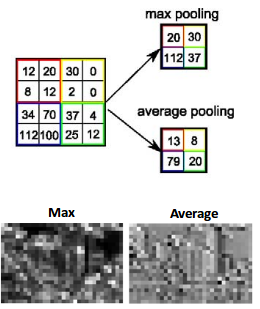


Max pooling extracts the most important features like edges whereas, average pooling extracts features so smoothly. For image data, you can see the difference. Although both are used for same reason, I think max pooling is better for extracting the extreme features. Average pooling sometimes can’t extract good features because it takes all into count and results an average value which may/may not be important for object detection type tasks.

Note here, average pooling brings all into count and flows it to next layer which means all values actually are used for feature mapping and creating output - which is a very generalized computation. If you don’t need all inputs from Conv layer, you will get bad accuracy for average pooling.

But, of course there are many classification tasks in github where average pooling has been used and outperformed max pooling (although I’m not sure this is because of using average pooling). So, again it depends on the type of dataset (basically I’m taking about images and their pixel density).

So, to answer your question, I don’t think average pooling has any significant advantage over max-pooling. But, may be in some cases, where variance in a max pool filter is not significant, both pooling will give same type results. But in extreme cases, max-pooling will provide better results for sure.

Added, with drop out pooling, all these doesn’t matter much, as drop out layers may vanish any single block. I have never seen any significant research paper to compare between pooling layers. But, there could be a few

In simple words, max pooling rejects a big chunk of data and retains at max 1/4th. Average pooling on the other hand, do not reject all of it and retains more information, in comparison to max pooling. This is what usually believed to lead to better results. But it depends on the scenario as well.

# When to use GlobalAveragePooling1D and when to use GlobalMaxPooling1D?
It depends a lot on your data and what you want from it. This is one of those cases where testing would be the only sure answer.

For instance, if you want to detect the presence of something in your sequences, max pooling seems a good option.

But if the contribution of the entire sequence seems important to your result, then average pooling sounds reasonable.

Now, since you're using LSTM layers, perhaps you should use return_sequences=False in the last LSTM layer. This is also a possibility instead of pooling. This will keep the last step of the sequence only. There might be the advantage of having the entire sequence processed, perhaps with cumulative effects in your result.

In all cases, testing is the only definitive answer.

In [18]:
model.add(GlobalAveragePooling1D())

In [19]:
model.add(Dense(24, activation='relu'))

In [20]:
model.add(Dense(6, activation='softmax'))  # Output of shape of this Dense-layer will be(None,6)

If your targets are one-hot encoded, use categorical_crossentropy.

Examples of one-hot encodings:
                [1,0,0]
                [0,1,0]
                [0,0,1]

But if your targets are integers, use sparse_categorical_crossentropy.

Examples of integer encodings (for the sake of completion):
                    1
                    2
                    3
                    
  
For such a model with output shape of (None, 6), the conventional way is to have the target outputs converted to the one-hot encoded array to match with the output shape, however, with the help of the sparse_categorical_crossentropy loss function, we can skip that step and keep the integers as targets.

All you need is replacing categorical_crossentropy with sparse_categorical_crossentropy when compiling the model like this.

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1780 samples, validate on 445 samples
Epoch 1/30
 - 1s - loss: 1.7748 - acc: 0.3011 - val_loss: 1.7508 - val_acc: 0.2404
Epoch 2/30
 - 0s - loss: 1.7119 - acc: 0.2674 - val_loss: 1.6674 - val_acc: 0.2921
Epoch 3/30
 - 0s - loss: 1.5919 - acc: 0.4584 - val_loss: 1.5122 - val_acc: 0.6180
Epoch 4/30
 - 0s - loss: 1.3984 - acc: 0.7337 - val_loss: 1.3094 - val_acc: 0.7169
Epoch 5/30
 - 0s - loss: 1.1663 - acc: 0.7944 - val_loss: 1.0883 - val_acc: 0.8607
Epoch 6/30
 - 0s - loss: 0.9367 - acc: 0.8916 - val_loss: 0.8880 - val_acc: 0.8517
Epoch 7/30
 - 0s - loss: 0.7430 - acc: 0.8854 - val_loss: 0.7270 - val_acc: 0.8539
Epoch 8/30
 - 0s - loss: 0.5946 - acc: 0.9191 - val_loss: 0.6045 - val_acc: 0.8854
Epoch 9/30
 - 0s - loss: 0.4823 - acc: 0.9315 - val_loss: 0.5162 - val_acc: 0.8854
Epoch 10/30
 - 0s - loss: 0.3992 - acc: 0.9354 - val_loss: 0.4506 - val_acc: 0.8921
Epoch 11/30
 - 0s - loss: 0

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [26]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



In [27]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [28]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()